In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the datasets
file_path_1 = Path("Data/US Airline Flight Routes and Fares 1993-2024.csv")
file_path_2 = Path("Data/cleaned_flight_data.csv")

# Read the first few rows of each dataset
df_raw = pd.read_csv(file_path_1)
df_cleaned = pd.read_csv(file_path_2)

C:\Users\kelvi\AppData\Local\Temp\ipykernel_30700\938236062.py:6: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_path_1)


In [4]:
# Display basic info and first few rows
df_raw_info = df_raw.info()
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [5]:
df_raw_head = df_raw.head()
df_cleaned_head = df_cleaned.head()

In [6]:
df_raw_info, df_raw_head, df_cleaned_info, df_cleaned_head

(None,
        tbl  Year  quarter  citymarketid_1  citymarketid_2  \
 0  Table1a  2021        3           30135           33195   
 1  Table1a  2021        3           30135           33195   
 2  Table1a  2021        3           30140           30194   
 3  Table1a  2021        3           30140           30194   
 4  Table1a  2021        3           30140           30466   
 
                             city1                          city2  airportid_1  \
 0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
 1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
 2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
 3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
 4                 Albuquerque, NM                    Phoenix, AZ        10140   
 
    airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
 0        14112       ABE  ...   81.43          G4  

In [7]:
# Drop unnecessary columns and rename for consistency
df_cleaned = df_raw.drop(columns=["Geocoded_City1", "Geocoded_City2", "tbl1apk"])
df_cleaned.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


In [8]:
# Standardizing column names
df_cleaned = df_cleaned.rename(columns={
    "tbl": "table",
    "Year": "year",
    "quarter": "quarter",
    "citymarketid_1": "departure_city_id",
    "citymarketid_2": "arrival_city_id",
    "city1": "departure_city",
    "city2": "arrival_city",
    "airportid_1": "departure_airport_id",
    "airportid_2": "arrival_airport_id",
    "airport_1": "departure_airport",
    "airport_2": "arrival_airport",
    "nsmiles": "distance_miles",
    "passengers": "passengers",
    "fare": "average_fare",
    "carrier_lg": "largest_carrier",
    "large_ms": "largest_carrier_market_share",
    "fare_lg": "largest_carrier_fare",
    "carrier_low": "low_fare_carrier",
    "lf_ms": "low_fare_market_share",
    "fare_low": "low_fare"
})

In [9]:
# Handling missing values
df_cleaned = df_cleaned.fillna({
    "largest_carrier": "Unknown",
    "largest_carrier_market_share": 0,
    "largest_carrier_fare": df_cleaned["largest_carrier_fare"].median(),
    "low_fare_carrier": "Unknown",
    "low_fare_market_share": 0,
    "low_fare": df_cleaned["low_fare"].median()
})

In [10]:
# Remove duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

In [11]:
# Save the cleaned dataset
cleaned_file_path = Path("Data/cleaned_flight_data_v2.csv")
df_cleaned.to_csv(cleaned_file_path, index=False)

In [12]:
# Display summary of cleaned data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   table                         245955 non-null  object 
 1   year                          245955 non-null  int64  
 2   quarter                       245955 non-null  int64  
 3   departure_city_id             245955 non-null  int64  
 4   arrival_city_id               245955 non-null  int64  
 5   departure_city                245955 non-null  object 
 6   arrival_city                  245955 non-null  object 
 7   departure_airport_id          245955 non-null  int64  
 8   arrival_airport_id            245955 non-null  int64  
 9   departure_airport             245955 non-null  object 
 10  arrival_airport               245955 non-null  object 
 11  distance_miles                245955 non-null  int64  
 12  passengers                    245955 non-nul

In [13]:
df_cleaned.head()

,table,year,quarter,departure_city_id,arrival_city_id,departure_city,arrival_city,departure_airport_id,arrival_airport_id,departure_airport,arrival_airport,distance_miles,passengers,average_fare,largest_carrier,largest_carrier_market_share,largest_carrier_fare,low_fare_carrier,low_fare_market_share,low_fare
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


### Data Analysis and Visualizations

In [14]:
# Set visualization style
sns.set_theme(style="whitegrid")

In [15]:
# Aggregate fare data by year
fare_trend = df_cleaned.groupby("year")["average_fare"].mean().reset_index()

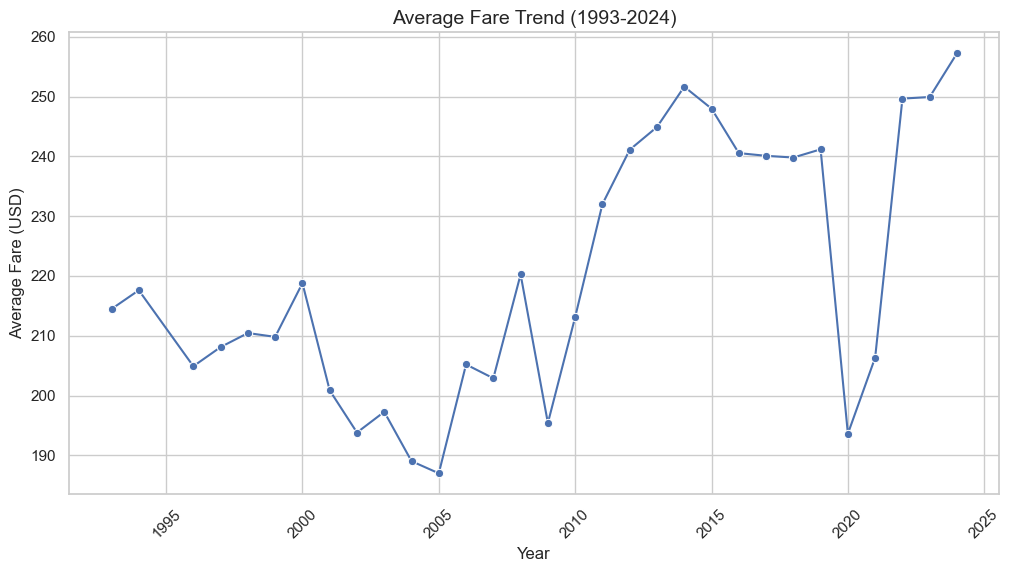

In [16]:
# Plot fare trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trend, x="year", y="average_fare", marker="o", color="b")
plt.title("Average Fare Trend (1993-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Fare (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

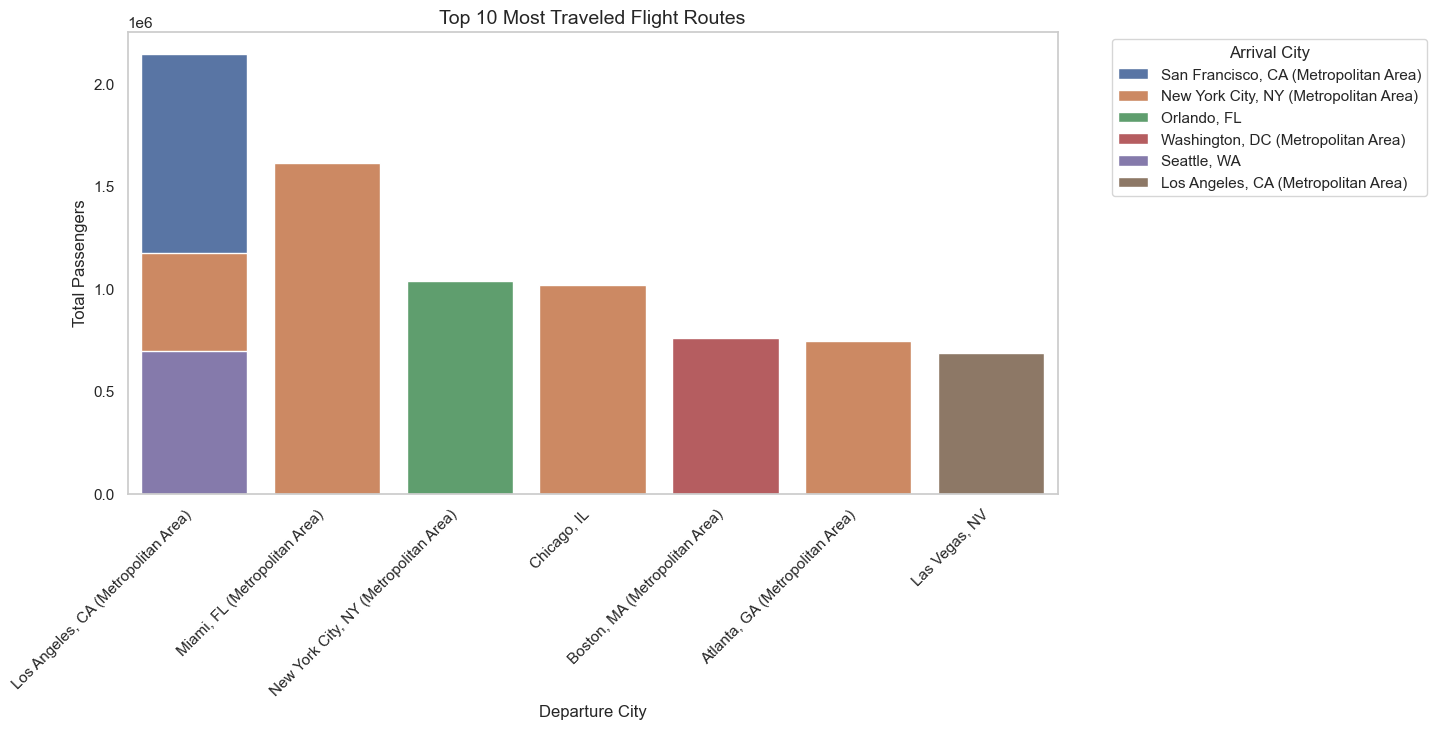

In [17]:
# Aggregate passenger volume by route
top_routes = df_cleaned.groupby(["departure_city", "arrival_city"])["passengers"].sum().reset_index()

# Get the top 10 most traveled routes
top_routes = top_routes.sort_values(by="passengers", ascending=False).head(10)

# Plot the most traveled routes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, y="passengers", x="departure_city", hue="arrival_city", dodge=False)
plt.title("Top 10 Most Traveled Flight Routes", fontsize=14)
plt.xlabel("Departure City", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Arrival City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")

plt.show()

In [18]:
# Load the cleaned dataset
file_path = Path("Data/cleaned_flight_data_v2.csv")
df = pd.read_csv(file_path)

In [19]:
# Group by year and quarter, calculating key statistics
quarterly_stats = df.groupby(["year", "quarter"]).agg(
    average_fare=("average_fare", "mean"),
    total_passengers=("passengers", "sum"),
    largest_market_share=("largest_carrier_market_share", "mean"),
    low_fare_market_share=("low_fare_market_share", "mean")
).reset_index()

In [20]:
# Display the first few rows
quarterly_stats.head()

,year,quarter,average_fare,total_passengers,largest_market_share,low_fare_market_share
0,1993,1,236.600889,345741,0.648664,0.428768
1,1993,2,209.415905,403857,0.641838,0.422033
2,1993,3,198.870923,393045,0.653791,0.437410
3,1993,4,213.500246,395495,0.642421,0.420185
4,1994,1,217.611944,397667,0.629556,0.419332


In [21]:
# Save results to a CSV file
quarterly_stats.to_csv("quarterly_flight_statistics.csv", index=False)

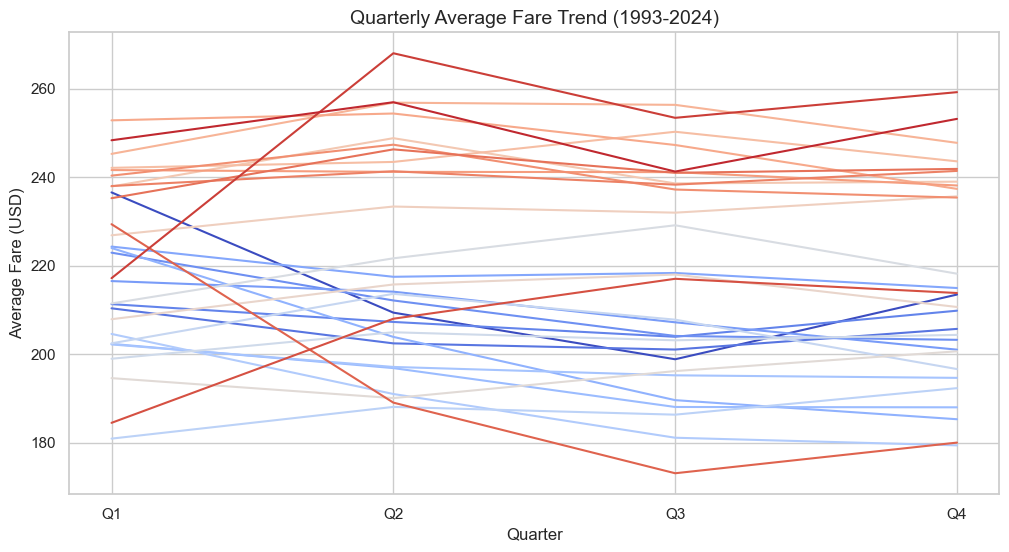

In [22]:
# Plot average fare trends over quarters
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_stats, x="quarter", y="average_fare", hue="year", palette="coolwarm", legend=False)
plt.title("Quarterly Average Fare Trend (1993-2024)", fontsize=14)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Average Fare (USD)", fontsize=12)
plt.xticks([1, 2, 3, 4], ["Q1", "Q2", "Q3", "Q4"])
plt.grid(True)
plt.show()

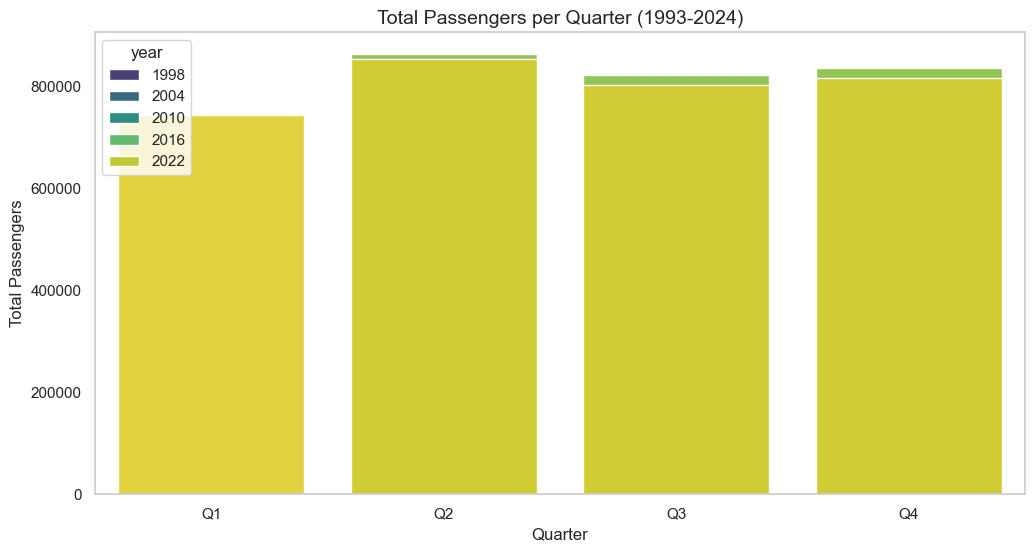

In [ ]:
#Total passengers per quarter (1993-2024)
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_stats, x="quarter", y="total_passengers", hue="year", palette="viridis", dodge=False)
plt.title("Total Passengers per Quarter (1993-2024)", fontsize=14)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks([0, 1, 2, 3], ["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis="y")
plt.show()


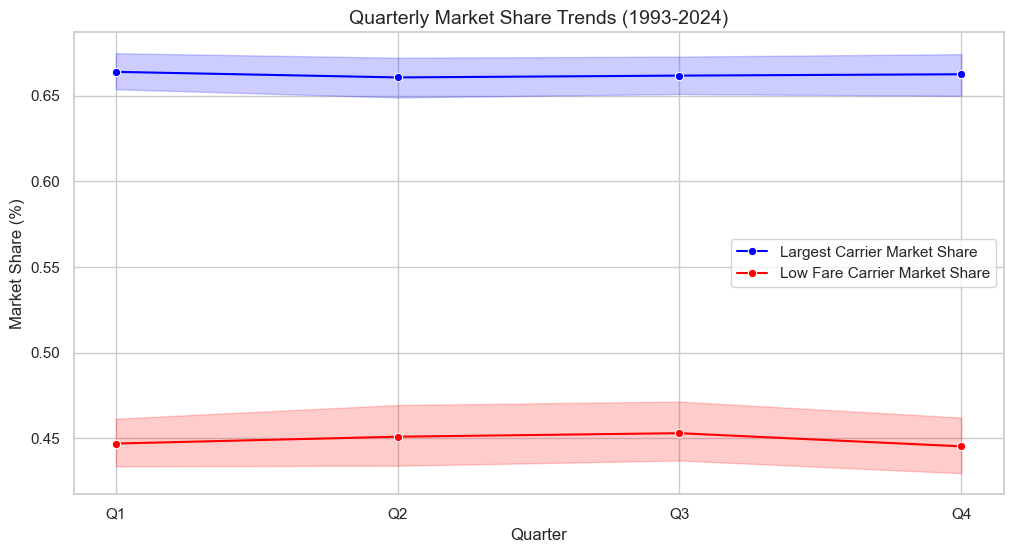

In [ ]:
# Quarterly Market share trends (1993-2024)
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_stats, x="quarter", y="largest_market_share", label="Largest Carrier Market Share", marker="o", color="blue")
sns.lineplot(data=quarterly_stats, x="quarter", y="low_fare_market_share", label="Low Fare Carrier Market Share", marker="o", color="red")
plt.title("Quarterly Market Share Trends (1993-2024)", fontsize=14)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Market Share (%)", fontsize=12)
plt.xticks([1, 2, 3, 4], ["Q1", "Q2", "Q3", "Q4"])
plt.legend()
plt.grid(True)
plt.show()


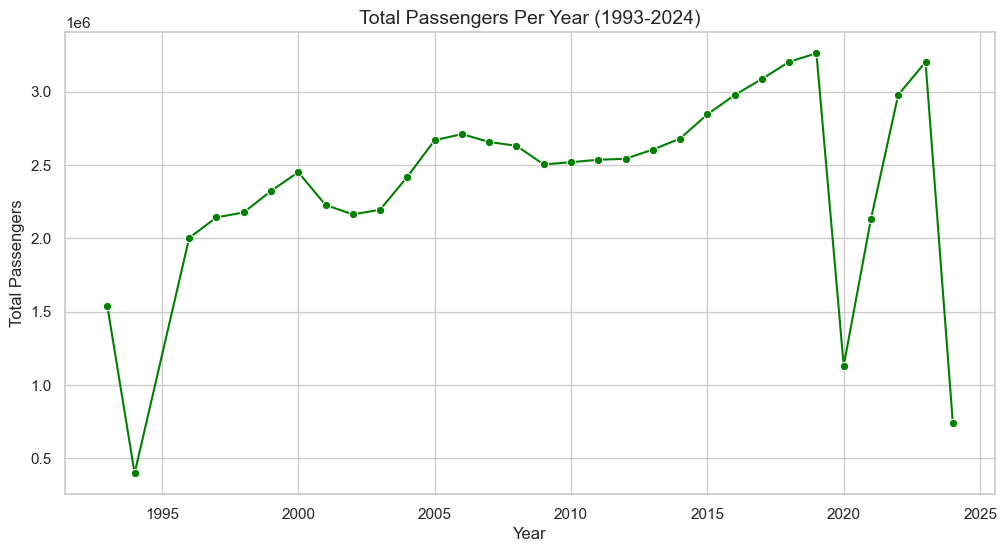

In [ ]:
#Yearly Passenger volume trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned.groupby("year")["passengers"].sum().reset_index(), x="year", y="passengers", marker="o", color="green")
plt.title("Total Passengers Per Year (1993-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.grid(True)
plt.show()


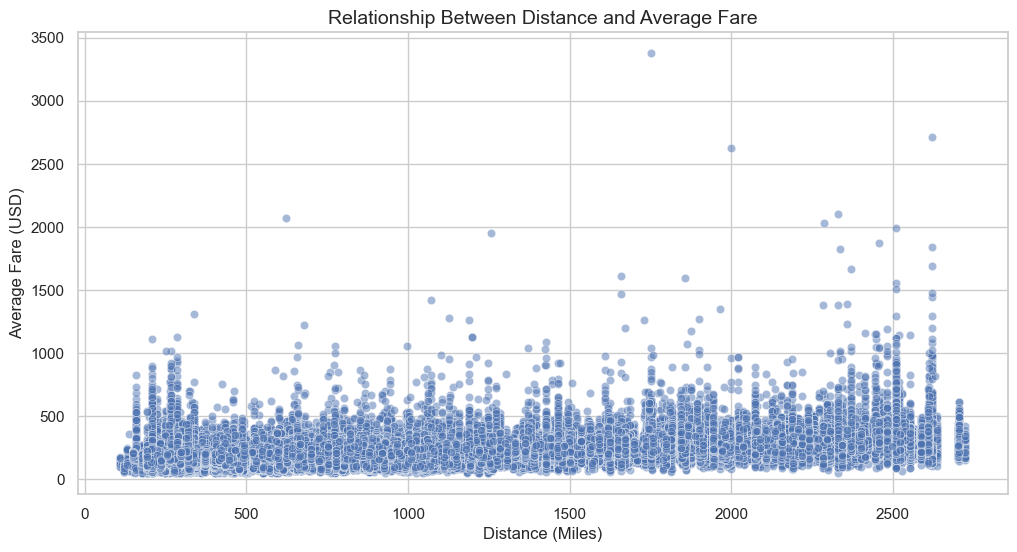

In [26]:
# Price vs. Distance Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x="distance_miles", y="average_fare", alpha=0.5)
plt.title("Relationship Between Distance and Average Fare", fontsize=14)
plt.xlabel("Distance (Miles)", fontsize=12)
plt.ylabel("Average Fare (USD)", fontsize=12)
plt.grid(True)
plt.show()

C:\Users\kelvi\AppData\Local\Temp\ipykernel_30700\3958360729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="coolwarm")


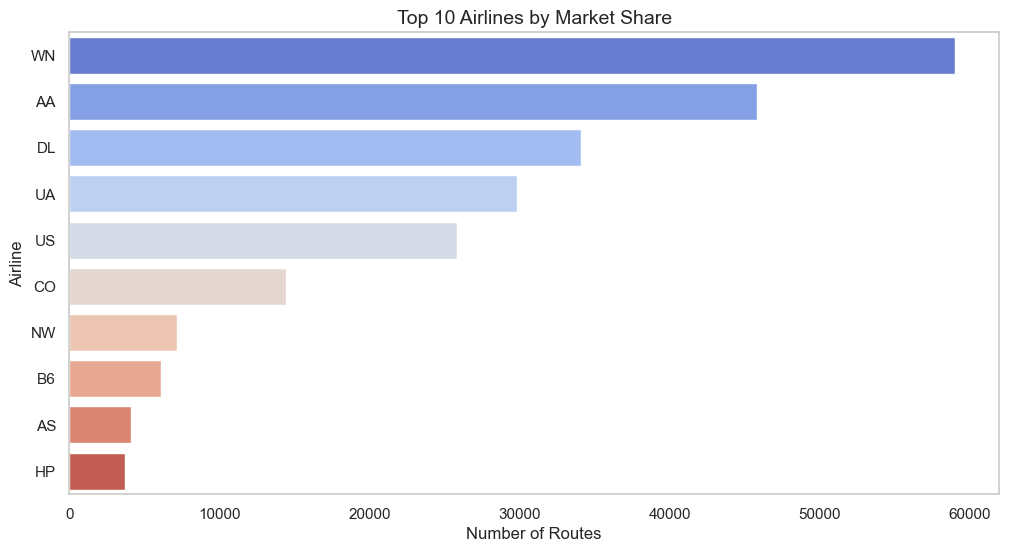

In [29]:
#Top 10 airlines by market share
top_airlines = df_cleaned["largest_carrier"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="coolwarm")
plt.title("Top 10 Airlines by Market Share", fontsize=14)
plt.xlabel("Number of Routes", fontsize=12)
plt.ylabel("Airline", fontsize=12)
plt.grid(axis="x")
plt.show()


In [37]:
# Cheapest routes
cheapest_routes = df_cleaned.nsmallest(10, "average_fare")[["departure_city", "arrival_city", "average_fare"]]
cheapest_routes



,departure_city,arrival_city,average_fare
35810,"Dallas/Fort Worth, TX","Washington, DC (Metropolitan Area)",50.00
42192,"Chicago, IL","Wichita, KS",50.40
147220,"Dallas/Fort Worth, TX","St. Louis, MO",50.41
131112,"Chicago, IL","Detroit, MI",50.50
127830,"Dallas/Fort Worth, TX","Los Angeles, CA (Metropolitan Area)",50.72
114736,"Cleveland, OH (Metropolitan Area)","New York City, NY (Metropolitan Area)",50.80
140699,"Charlotte, NC","Washington, DC (Metropolitan Area)",50.80
170482,"Dallas/Fort Worth, TX","St. Louis, MO",50.96
16430,"Reno, NV","San Francisco, CA (Metropolitan Area)",50.98
96563,"Reno, NV","San Francisco, CA (Metropolitan Area)",50.98


In [38]:
# Most expensive routes
expensive_routes = df_cleaned.nlargest(10, "average_fare")[["departure_city", "arrival_city", "average_fare"]]
expensive_routes

,departure_city,arrival_city,average_fare
144393,"Chicago, IL","Portland, OR",3377.00
90359,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2716.00
149545,"Detroit, MI","Los Angeles, CA (Metropolitan Area)",2628.90
94012,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",2104.90
74780,"Chicago, IL","Washington, DC (Metropolitan Area)",2074.00
137194,"Reno, NV","Washington, DC (Metropolitan Area)",2034.35
17674,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1991.00
91821,"Boston, MA (Metropolitan Area)","Kansas City, MO",1950.00
43531,"San Francisco, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",1871.00
96875,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",1841.70
